In [1]:
%load_ext autoreload
%autoreload 2

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import random
from hydranerv.model.network import Network
from hydranerv.model.latent_variable import LatentVariable
from hydranerv.utils.utils import *

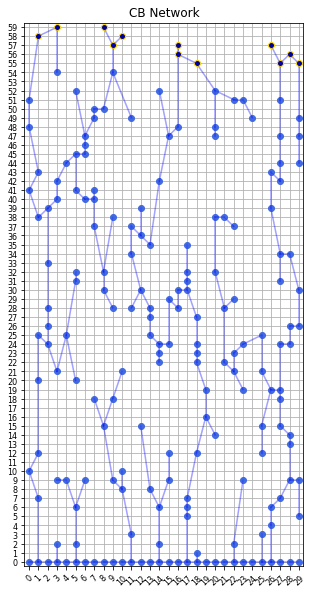

In [3]:
cbnetwork = Network(type="CB", 
                  numx=30, 
                  numy=60, 
                  neuron_density=0.1, 
                  pacemaker_density=1,
                  link_maxdist=2, 
                  link_density=0.2,
                  gc=20000,
                  theta_amp=250)
cbnetwork.display()

In [4]:
T = 400000
dt = 1
theta_train = np.zeros((int(T/dt)+1, 30, 60))
var_lat = LatentVariable()
light_train = np.zeros((int(T/dt)+1, 30, 60))
i_stim_train = np.zeros((int(T/dt)+1, 30, 60))

random_neuron = cbnetwork.neurons[(0,0)]
time = np.arange(0, T+dt, dt)
n = len(time)
for j in tqdm(range(n)):
    t = time[j]
    if j > 0:
        cb_fired = random_neuron.spike_train[-1]
    else:
        cb_fired = False
    theta = var_lat.step(t, cb_fired)
    cbnetwork.step(t, np.zeros((30, 60)) + theta, light_train[int(t/dt)], i_stim_train[int(t/dt)])

100%|██████████| 400001/400001 [05:22<00:00, 1238.69it/s]


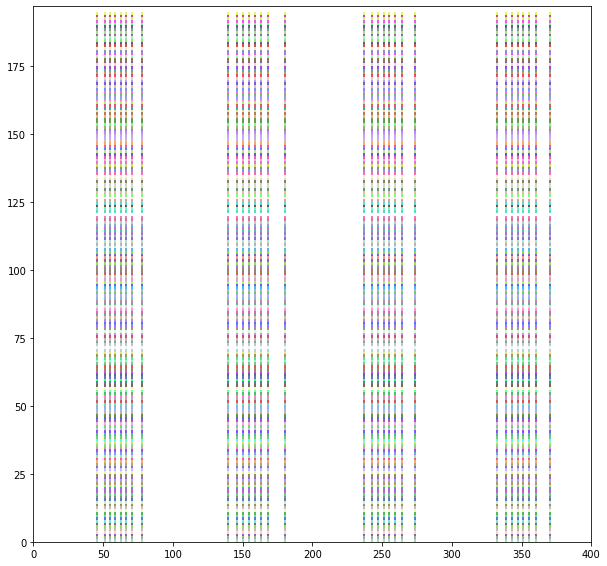

In [16]:
plt.figure(figsize=(10, 0.05*len(cbnetwork.neurons)))

neurons = cbnetwork.neurons

for k, neuron in enumerate(neurons.values()):
    color = randomcolor()
    for i in range(len(neuron.spike_train)):
        spike = neuron.spike_train[i]
        if spike:
            plt.vlines(i/1000, k, k+1, color)

plt.xlim(0, T/1000)
plt.ylim(0, len(cbnetwork.neurons))
plt.show()

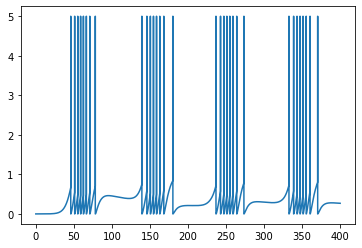

In [26]:
plt.plot(np.arange(0, (T+dt) / 1000, dt / 1000), list(neurons.values())[0].v_train)

In [39]:
# Save data
data = np.zeros((len(cbnetwork.neurons), T+3))

In [46]:
for i, neuron in enumerate(cbnetwork.neurons):
    data[i][0] = neuron[0]
    data[i][1] = neuron[1]
    data[i][2:] = cbnetwork.neurons[neuron].v_train

In [54]:
pd.DataFrame(data).to_csv("../results/v_trains/cbnetwork_vtrains.csv")